## Car Evaluation

In [52]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [20]:
data = pd.read_csv("car.data.csv")
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [21]:
#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)

# Data Management
data_clean = data.dropna()

In [22]:
cluster = data_clean
cluster.describe()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASS
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,2,big,high,unacc
freq,432,432,432,576,576,576,1210


In [23]:
# Need to encode data from string to int representation

# buying       v-high, high, med, low
buying_dict = {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}

# maint        v-high, high, med, low
maint_dict = {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}
   
# doors        2, 3, 4, 5-more
doors_dict = {'5more': 5}
   
# persons      2, 4, more
persons_dict = {'more': 5}

# lug_boot     small, med, big
lug_boot_dict = {'small': 1, 'med': 2, 'big': 3}

# safety       low, med, high
safety_dict = {'low': 1, 'med': 2, 'high': 3}

# class        unacc, acc, good, v-good
class_dict = {'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4}

In [24]:
data_clean.BUYING = data_clean.BUYING.replace(buying_dict)
data_clean.MAINT = data_clean.MAINT.replace(maint_dict)
data_clean.DOORS = data_clean.DOORS.replace(doors_dict)
data_clean.PERSONS = data_clean.PERSONS.replace(persons_dict)
data_clean.LUG_BOOT = data_clean.LUG_BOOT.replace(lug_boot_dict)
data_clean.SAFETY = data_clean.SAFETY.replace(safety_dict)
data_clean.CLASS = data_clean.CLASS.replace(class_dict)

In [25]:
data_clean.head()

,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASS
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


In [26]:
clustervar = cluster.copy()
for col in clustervar.columns:
    clustervar[col] = preprocessing.scale(clustervar[col].astype('float64'))

In [27]:
clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)

In [56]:
print(clus_train.shape, clus_test.shape)

(1209, 8) (519, 7)


In [28]:
# k-means cluster analysis for 1-9 clusters                                                           
from scipy.spatial.distance import cdist
clusters = range(1,10)
meandist = []

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

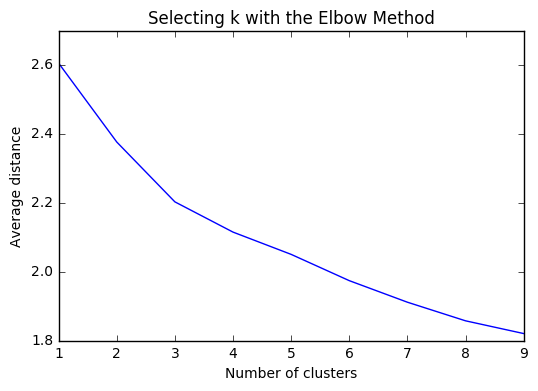

In [29]:
"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [30]:
# Interpret 3 cluster solution
model3 = KMeans(n_clusters=3)
model3.fit(clus_train)
clusassign = model3.predict(clus_train)

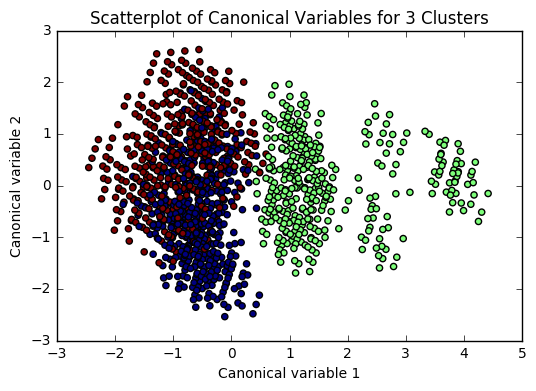

In [31]:
# plot clusters
from sklearn.decomposition import PCA

pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(clus_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 3 Clusters')
plt.show()

In [32]:
# create a unique identifier variable from the index for the 
# cluster training data to merge with the cluster assignment variable
clus_train.reset_index(level=0, inplace=True)
# create a list that has the new index variable
cluslist = list(clus_train['index'])
# create a list of cluster assignments
labels = list(model3.labels_)
# combine index variable list with cluster assignment list into a dictionary
newlist = dict(zip(cluslist, labels))
newlist

{0: 2,
 1: 2,
 2: 2,
 3: 2,
 4: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 0,
 10: 0,
 11: 0,
 14: 0,
 16: 0,
 17: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 2,
 29: 2,
 30: 2,
 32: 2,
 33: 2,
 34: 2,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 44: 0,
 46: 0,
 47: 0,
 49: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 2,
 55: 2,
 56: 2,
 57: 2,
 58: 2,
 59: 2,
 60: 2,
 62: 2,
 64: 0,
 67: 0,
 68: 0,
 70: 0,
 71: 0,
 73: 0,
 74: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 2,
 82: 2,
 83: 2,
 87: 2,
 88: 2,
 89: 2,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 95: 0,
 96: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 2,
 109: 2,
 111: 2,
 112: 2,
 113: 2,
 114: 2,
 117: 0,
 118: 0,
 121: 0,
 122: 0,
 123: 0,
 124: 0,
 125: 0,
 126: 0,
 127: 0,
 128: 0,
 133: 0,
 135: 2,
 137: 2,
 139: 2,
 140: 2,
 143: 2,
 144: 0,
 145: 0,
 146: 0,
 149: 0,
 151: 0,
 152: 0,
 153: 0,
 157: 0,
 158: 0,
 159: 0,
 160: 0,
 162: 2,
 163: 2,
 164: 2,
 165: 2,
 166: 2,
 168: 2,
 170: 2,
 173: 0,
 174: 0,
 

In [33]:
# convert newlist dictionary to a dataframe
newclus = DataFrame.from_dict(newlist, orient='index')
newclus

,0
0,2
1,2
2,2
3,2
4,2
6,2
7,2
8,2
9,0
10,0


In [34]:
# rename the cluster assignment column
newclus.columns = ['cluster']

In [36]:
# now do the same for the cluster assignment variable
# create a unique identifier variable from the index for the 
# cluster assignment dataframe 
# to merge with cluster training data
newclus.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
# cluster frequencies
merged_train.cluster.value_counts()

0    439
2    404
1    366
Name: cluster, dtype: int64

In [37]:
# FINALLY calculate clustering variable means by cluster
clustergrp = merged_train.groupby('cluster').mean()
print("Clustering variable means by cluster")
print(clustergrp)

Clustering variable means by cluster
               index    BUYING     MAINT     DOORS   PERSONS  LUG_BOOT  \
cluster                                                                  
0         704.471526  0.274033  0.233285 -0.074366  0.670893 -0.133913   
1        1043.404372 -0.276148 -0.327468  0.048876  0.659390  0.217509   
2         847.972772 -0.002214  0.057562 -0.022139 -1.336306 -0.009095   

           SAFETY     CLASS     level_0  
cluster                                  
0       -0.566340 -0.560349  498.202733  
1        0.706069  1.310377  736.333333  
2        0.054568 -0.560349  599.076733  


In [43]:
# validate clusters in training data by examining cluster differences in GPA using ANOVA
# first have to merge GPA with clustering variables and cluster assignment data 
class_data = data_clean['CLASS']
# split GPA data into train and test sets
class_train, gpa_test = train_test_split(class_data, test_size=.3, random_state=123)
class_train1 = pd.DataFrame(class_train)
class_train1.reset_index(level=0, inplace=True)
merged_train_all = pd.merge(class_train1, merged_train, on='index')
merged_train_all

,index,CLASS_x,BUYING,MAINT,DOORS,PERSONS,LUG_BOOT,SAFETY,CLASS_y,level_0,cluster
0,1468,2,-1.341641,0.447214,0.447214,0.267261,-1.224745,0.000000,0.790116,1037,1
1,152,1,1.341641,0.447214,-0.447214,0.267261,1.224745,1.224745,-0.560349,105,0
2,1119,1,-0.447214,-0.447214,-0.447214,0.267261,0.000000,-1.224745,-0.560349,794,0
3,1252,2,-0.447214,-1.341641,0.447214,0.267261,-1.224745,0.000000,0.790116,885,1
4,556,2,0.447214,0.447214,-1.341641,0.267261,1.224745,0.000000,0.790116,399,1
5,1251,1,-0.447214,-1.341641,0.447214,0.267261,-1.224745,-1.224745,-0.560349,884,0
6,157,1,1.341641,0.447214,-0.447214,1.069045,0.000000,0.000000,-0.560349,107,0
7,521,1,0.447214,1.341641,1.341641,-1.336306,1.224745,1.224745,-0.560349,374,2
8,1470,1,-1.341641,0.447214,0.447214,0.267261,0.000000,-1.224745,-0.560349,1039,0
9,1427,2,-1.341641,0.447214,-1.341641,1.069045,0.000000,1.224745,0.790116,1007,1


In [58]:
sub1 = merged_train_all[['CLASS_x', 'cluster']].dropna()

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

gpamod = smf.ols(formula='CLASS_x ~ C(cluster)', data=sub1).fit()
print (gpamod.summary())

print ('means for CLASS by cluster')
m1 = sub1.groupby('cluster').mean()
print(m1)

print('standard deviations for CLASS by cluster')
m2 = sub1.groupby('cluster').std()
print(m2)

mc1 = multi.MultiComparison(sub1['CLASS_x'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                CLASS_x   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     1599.
Date:                Sat, 03 Feb 2018   Prob (F-statistic):               0.00
Time:                        13:23:12   Log-Likelihood:                -579.69
No. Observations:                1209   AIC:                             1165.
Df Residuals:                    1206   BIC:                             1181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.0000      0.019     

### Summary

A k-means cluster analysis was conducted to identify underlying subgroups of cars that are split into classes baed on 7 variables. Clustering variables included categorical vaiables, which were encoded from string categorical variables. All clustering variables were standardized to have a mean of 0 and a standard deviation of 1.

Data were randomly split into a training set that included 70% of the observations (N=1209) and a test set that included 30% of the observations (N=519). A series of k-means cluster analyses were conducted on the training data specifying k=1-9 clusters, using Euclidean distance. The variance in the clustering variables that was accounted for by the clusters (r-square) was plotted for each of the nine cluster solutions in an elbow curve to provide guidance for choosing the number of clusters to interpret.

The elbow curve was inconclusive, suggesting that the 3-cluster solution might be interpreted

In order to externally validate the clusters, an Analysis of Variance (ANOVA) was conducting to test for significant differences between the clusters on car class (CLASS_x - encoded variable). A tukey test was used for post hoc comparisons between the clusters. Results indicated significant differences between the clusters on CLASS. The tukey post hoc comparisons showed significant differences between clusters on CLASS, with the exception that clusters 0 and 2 were not significantly different from each other.